# Load

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams, cm
from scipy import signal

def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    # print(data.shape, data)s
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)

In [2]:
# remix from patriarka
voluntarios, trials, classes, eletrodos, valores = 10, 3, 8, 4, 1600
data = np.empty((voluntarios, trials, classes, eletrodos, valores))

for voluntario in range(voluntarios):
    for trial in range(trials):
        d = np.load(f'./datasets/topicos_cc/s{voluntario+1:02d}_{trial+1}.npy')
        d = np.swapaxes(d, -1, -2)
        data[voluntario, trial] = d

print(f'{data.shape} - (voluntarios, trials, classes, eletrodos, valores)')

(10, 3, 8, 4, 1600) - (voluntarios, trials, classes, eletrodos, valores)


# Mesma classe, diferentes trials

~~~~~~~~~~~~~~~~ VOLUNTARIO 6 ~~~~~~~~~~~~~~~~~~


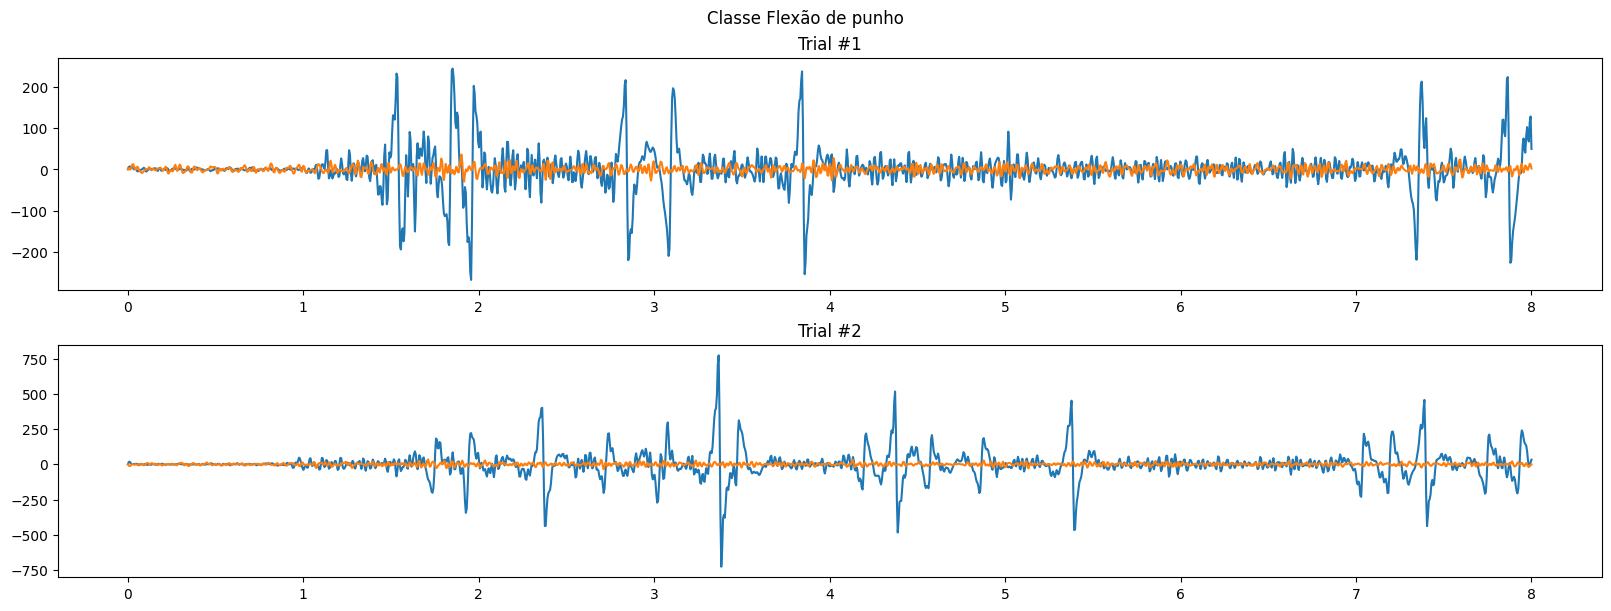

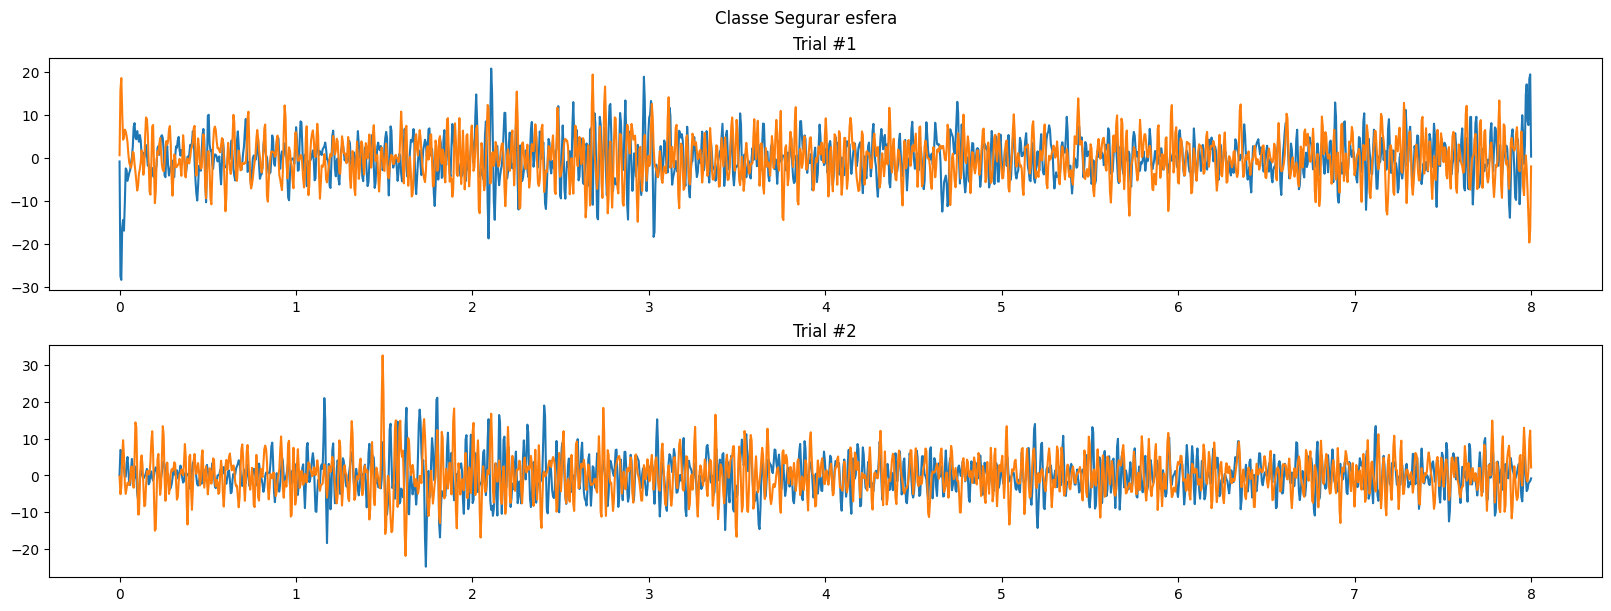

In [40]:
# 2D
# (voluntarios, trials, classes, eletrodos, valores)
# compareTrials(data[voluntario]) -> data = trials, classes, eletrodos, valores
def compareTrials(data, trials=None, classes=None, eletrodos=None):
    if not data.shape:
        data = np.array(data)

    trialQtde = trials if trials else [i for i in range(data.shape[0])]
    classeQtde = classes if classes else [i for i in range(data.shape[1])]
    eletrodoQtde = eletrodos if eletrodos else [i for i in range(data.shape[2])]
    protocol = ['Flexão de punho', 'Extensão de punho', 'Pinça', 'Segurar cartão', 'Segurar caneta', 'Segurar esfera', 'Segurar copo', 'Gancho']
    
    #world params
    x = np.linspace(0, 8, 1600) #de 0 a 8segundos - 1600 pontos
    rcParams['figure.figsize'] = [16., 3.5 * len(trialQtde)]

    for classe in classes:
        fig, axs = plt.subplots(len(trialQtde), 1, constrained_layout=True)        
        ax = [axs] if len(trialQtde) < 2 else axs

        fig.suptitle(f'Classe {protocol[classe]}')

        for i, trial in enumerate(trialQtde):
            for eletrodo in eletrodos:
                ax[i].set_title(f'Trial #{trial}')
                bp_data = butter_bandpass(data[trial][classe][eletrodo], 5, 50)
                ax[i].plot(x, bp_data)

        plt.show()
#end
    
for i, voluntario in enumerate(data):
    if i in [5]: # pra quando nao quiser printar tudo
        print('=================================================')
        print(f'~~~~~~~~~~~~~~~~ VOLUNTARIO {i+1} ~~~~~~~~~~~~~~~~~~')
        print('=================================================')
        compareTrials(voluntario, trials=[1,2], classes=[0,5], eletrodos=[2,3])

~~~~~~~~~~~~~~~~ VOLUNTARIO 2 ~~~~~~~~~~~~~~~~~~


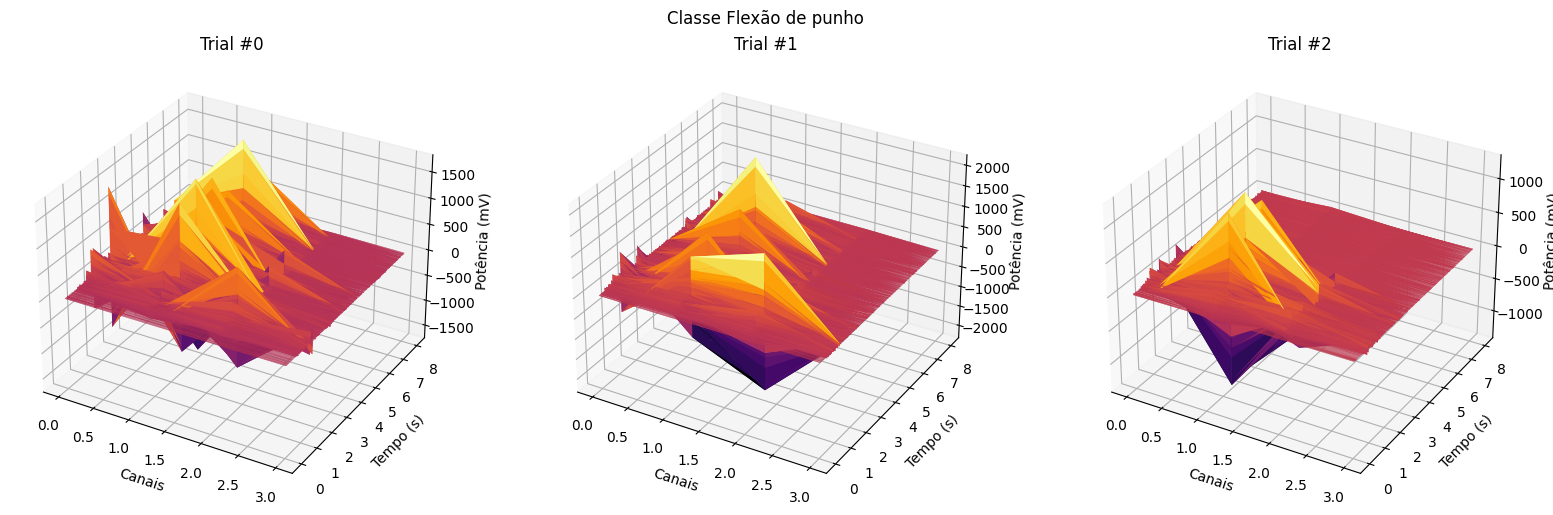

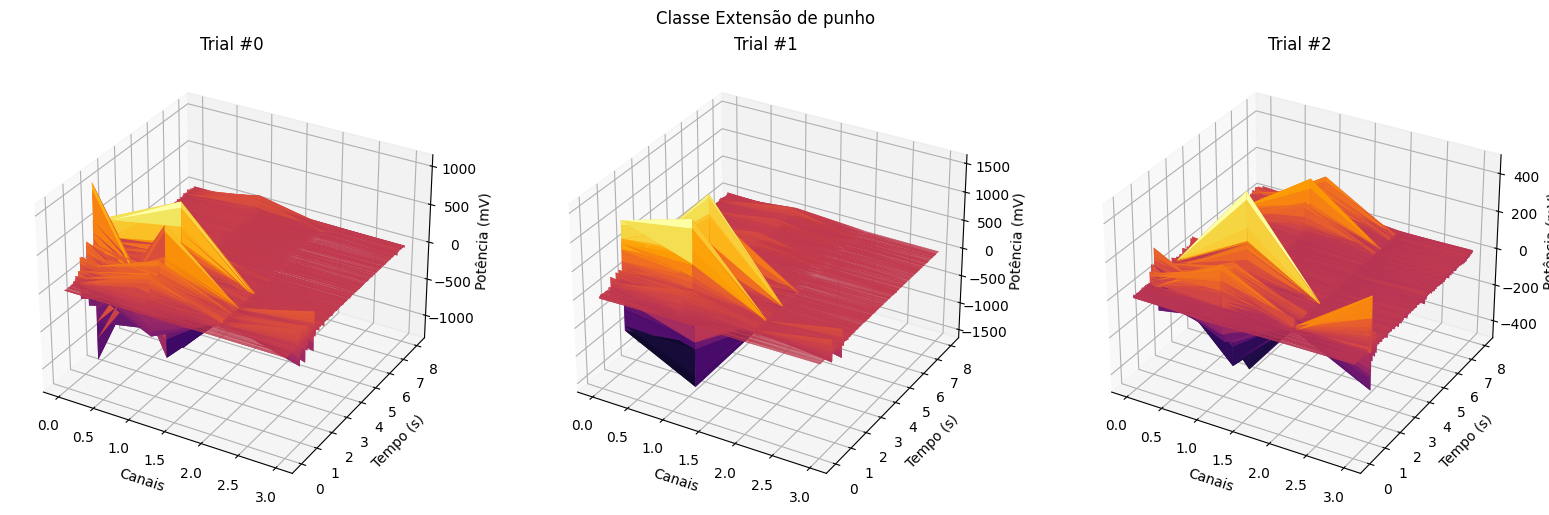

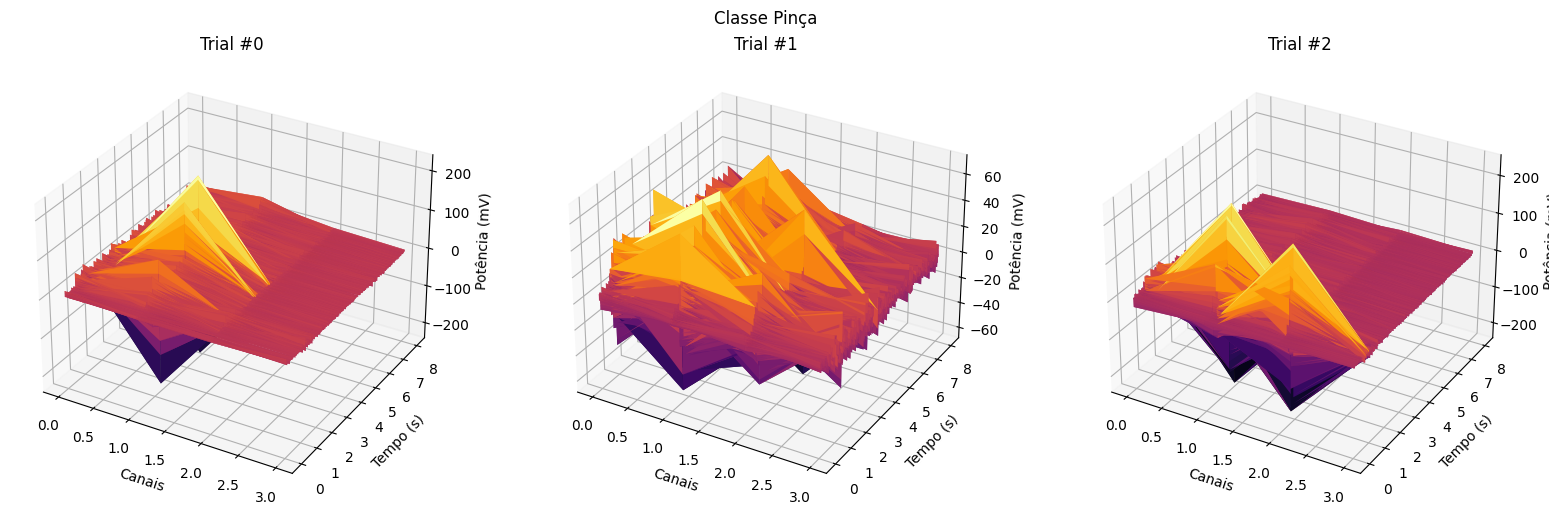

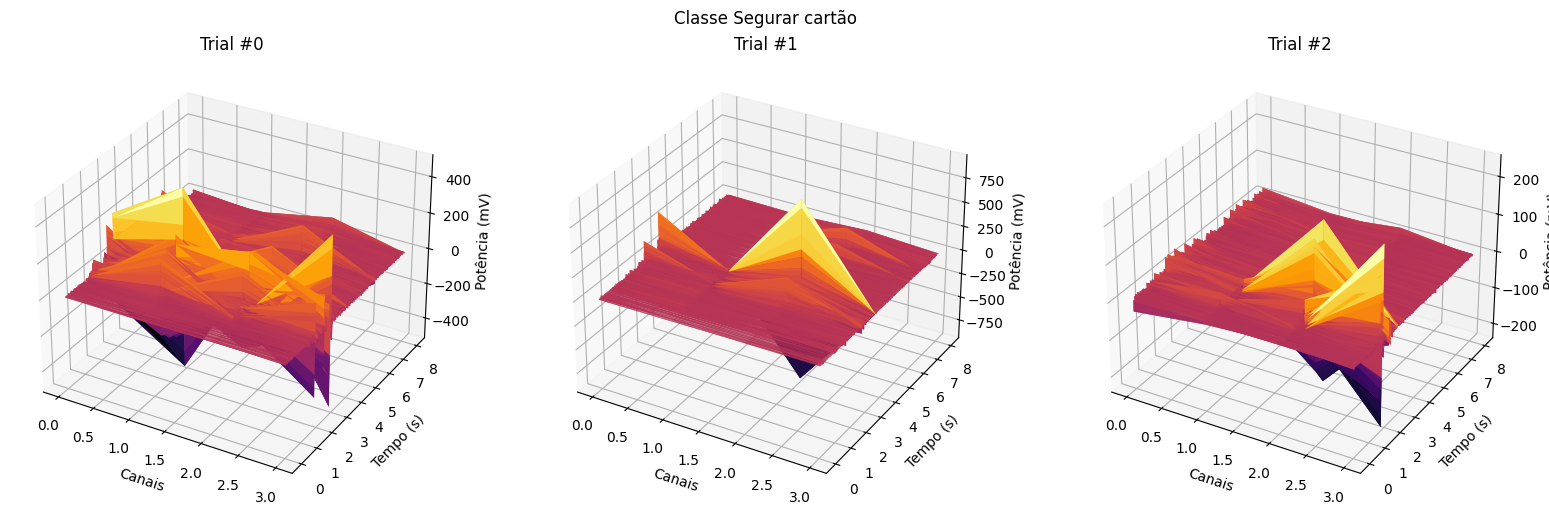

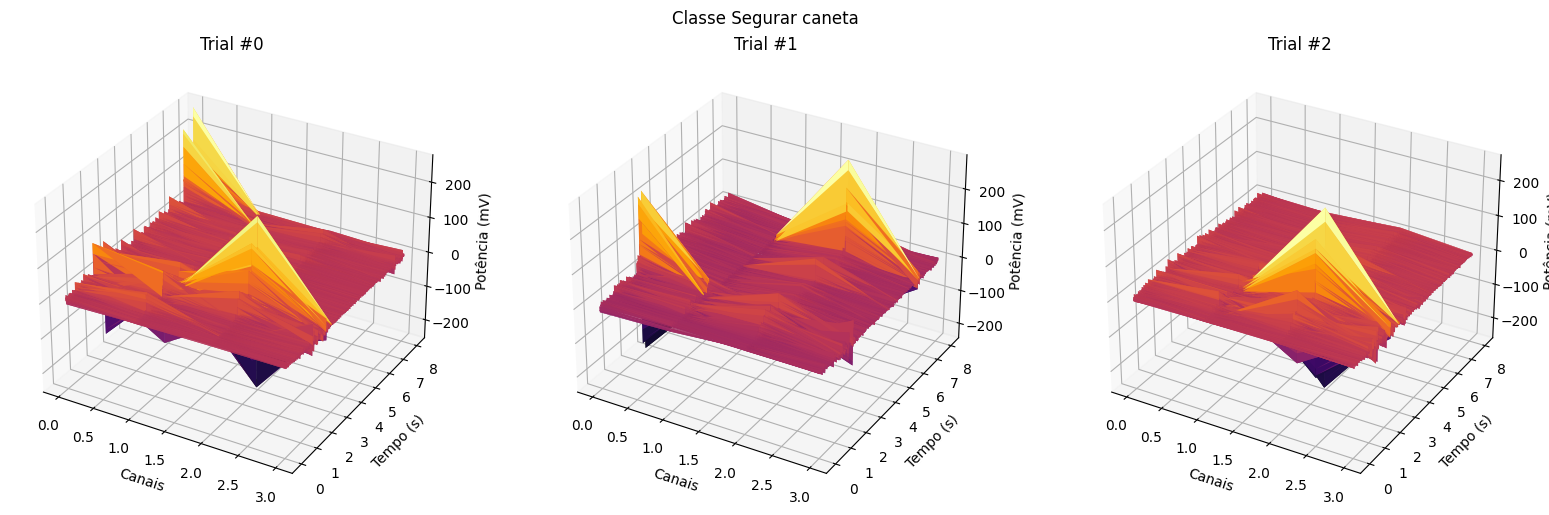

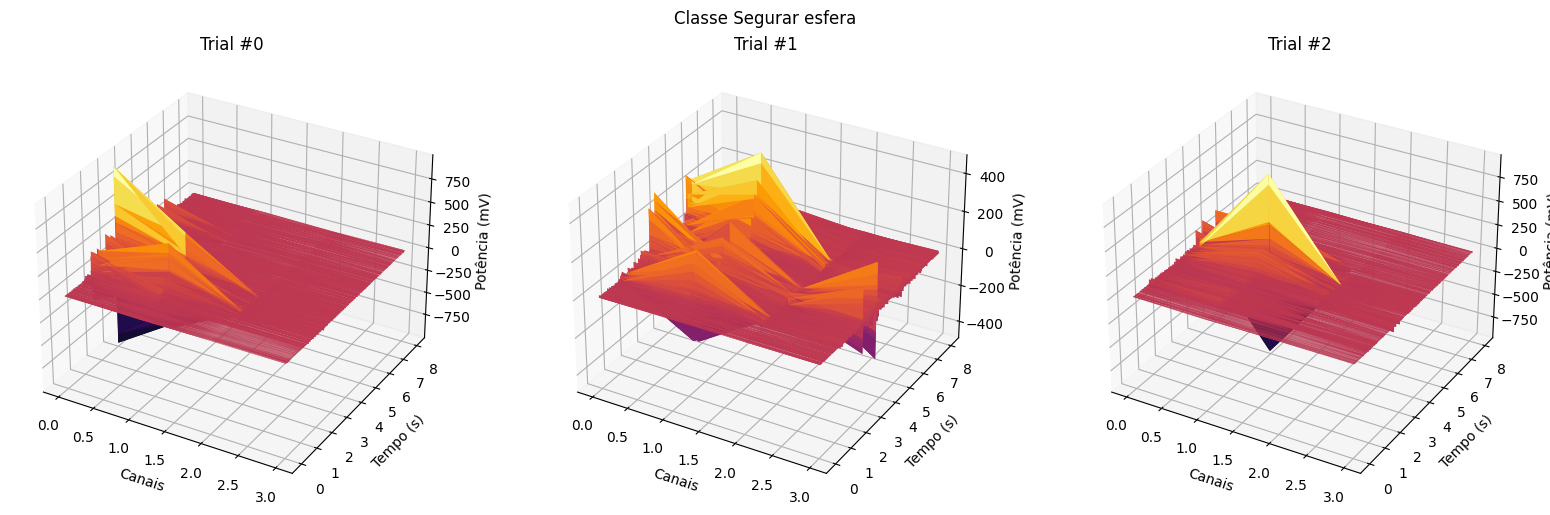

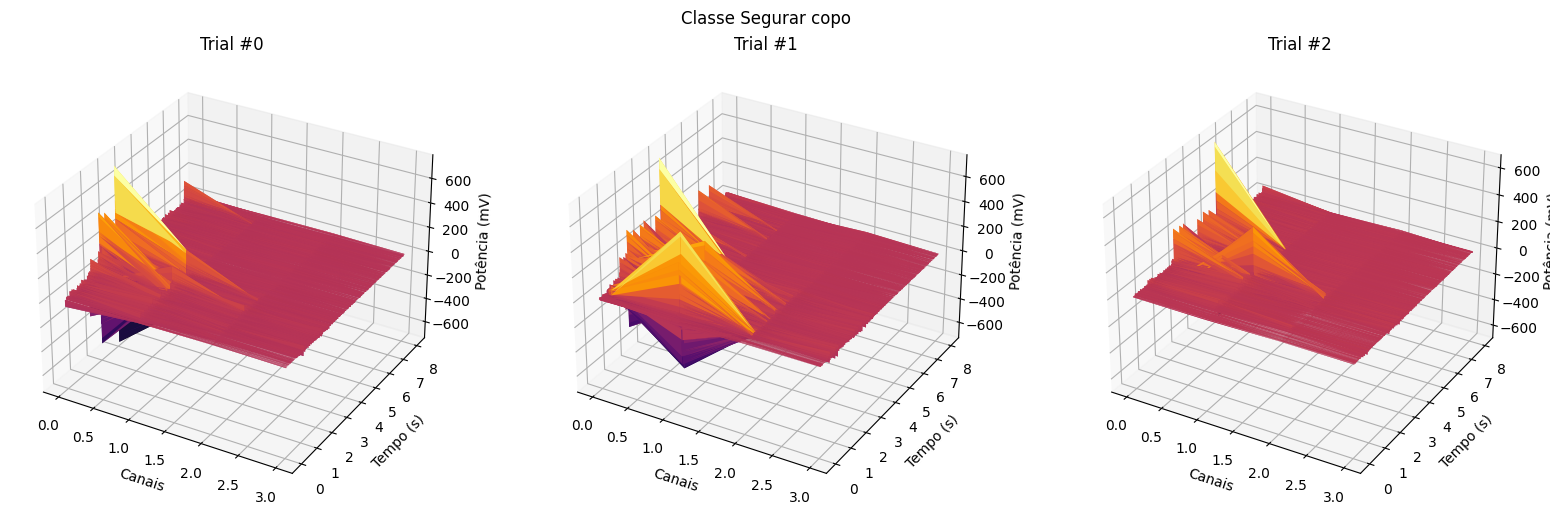

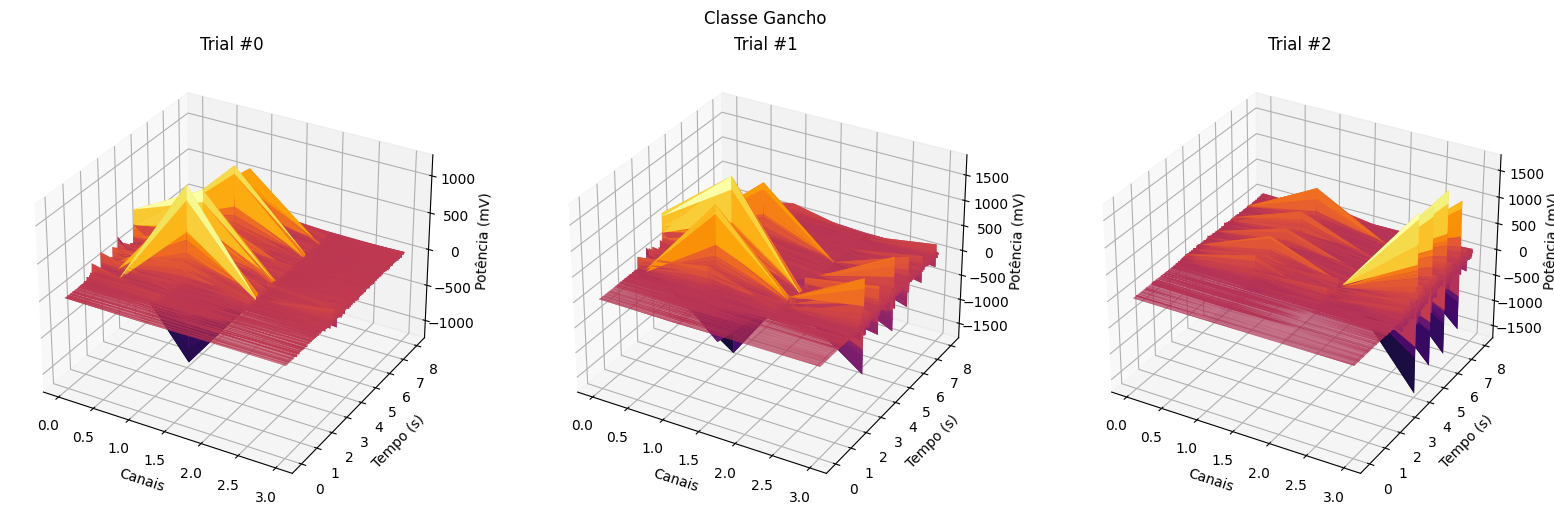

In [4]:
# 3D
# (voluntarios, trials, classes, eletrodos, valores)
# compareTrials(data[voluntario]) -> data = trials, classes, eletrodos, valores
def compareTrials3d(data):
    if not data.shape:
        data = np.array(data)

    trialQtde = data.shape[0]
    classeQtde = data.shape[1]
    eletrodoQtde = data.shape[2]
    protocol = ['Flexão de punho', 'Extensão de punho', 'Pinça', 'Segurar cartão', 'Segurar caneta', 'Segurar esfera', 'Segurar copo', 'Gancho']
    
    for classe in range(classeQtde):
        rcParams['figure.figsize'] = [16., 5.]
        fig, ax = plt.subplots(1, trialQtde, constrained_layout=True, subplot_kw={"projection": "3d"})  
        fig.suptitle(f'Classe {protocol[classe]}')

        for trial in range(trialQtde):      
            plot_data = []
            for eletrodo in range(eletrodoQtde):
                bp_data = butter_bandpass(data[trial][classe][eletrodo], 5, 50)

                for i, time in enumerate(np.linspace(0, 8, 1600)):
                    #data = trials, classes, eletrodos, valores
                    plot_data.append([eletrodo, time, bp_data[i]])
            plot_data = np.array(plot_data)

            # ax[trial] = plt.axes(projection ='3d')
            # ax[trial].set_title(f'Classe {protocol[classe]}')
            ax[trial].set_title(f'Trial #{trial}')
            ax[trial].set_xlabel('Canais')
            ax[trial].set_ylabel('Tempo (s)')
            ax[trial].set_zlabel('Potência (mV)')
            
            x, y, z = plot_data[:,0], plot_data[:,1], plot_data[:,2]
            ax[trial].plot_trisurf(x, y, z, antialiased=True, cmap=cm.inferno) #, linewidth=1)

        plt.show()
#end
    
for i, voluntario in enumerate(data):
    if i in [1]: # pra quando nao quiser printar tudo
        print('=================================================')
        print(f'~~~~~~~~~~~~~~~~ VOLUNTARIO {i+1} ~~~~~~~~~~~~~~~~~~')
        print('=================================================')
        compareTrials3d(voluntario)

# Diferentes classes, mesmo trial

~~~~~~~~~~~~~~~~ VOLUNTARIO 1 ~~~~~~~~~~~~~~~~~~


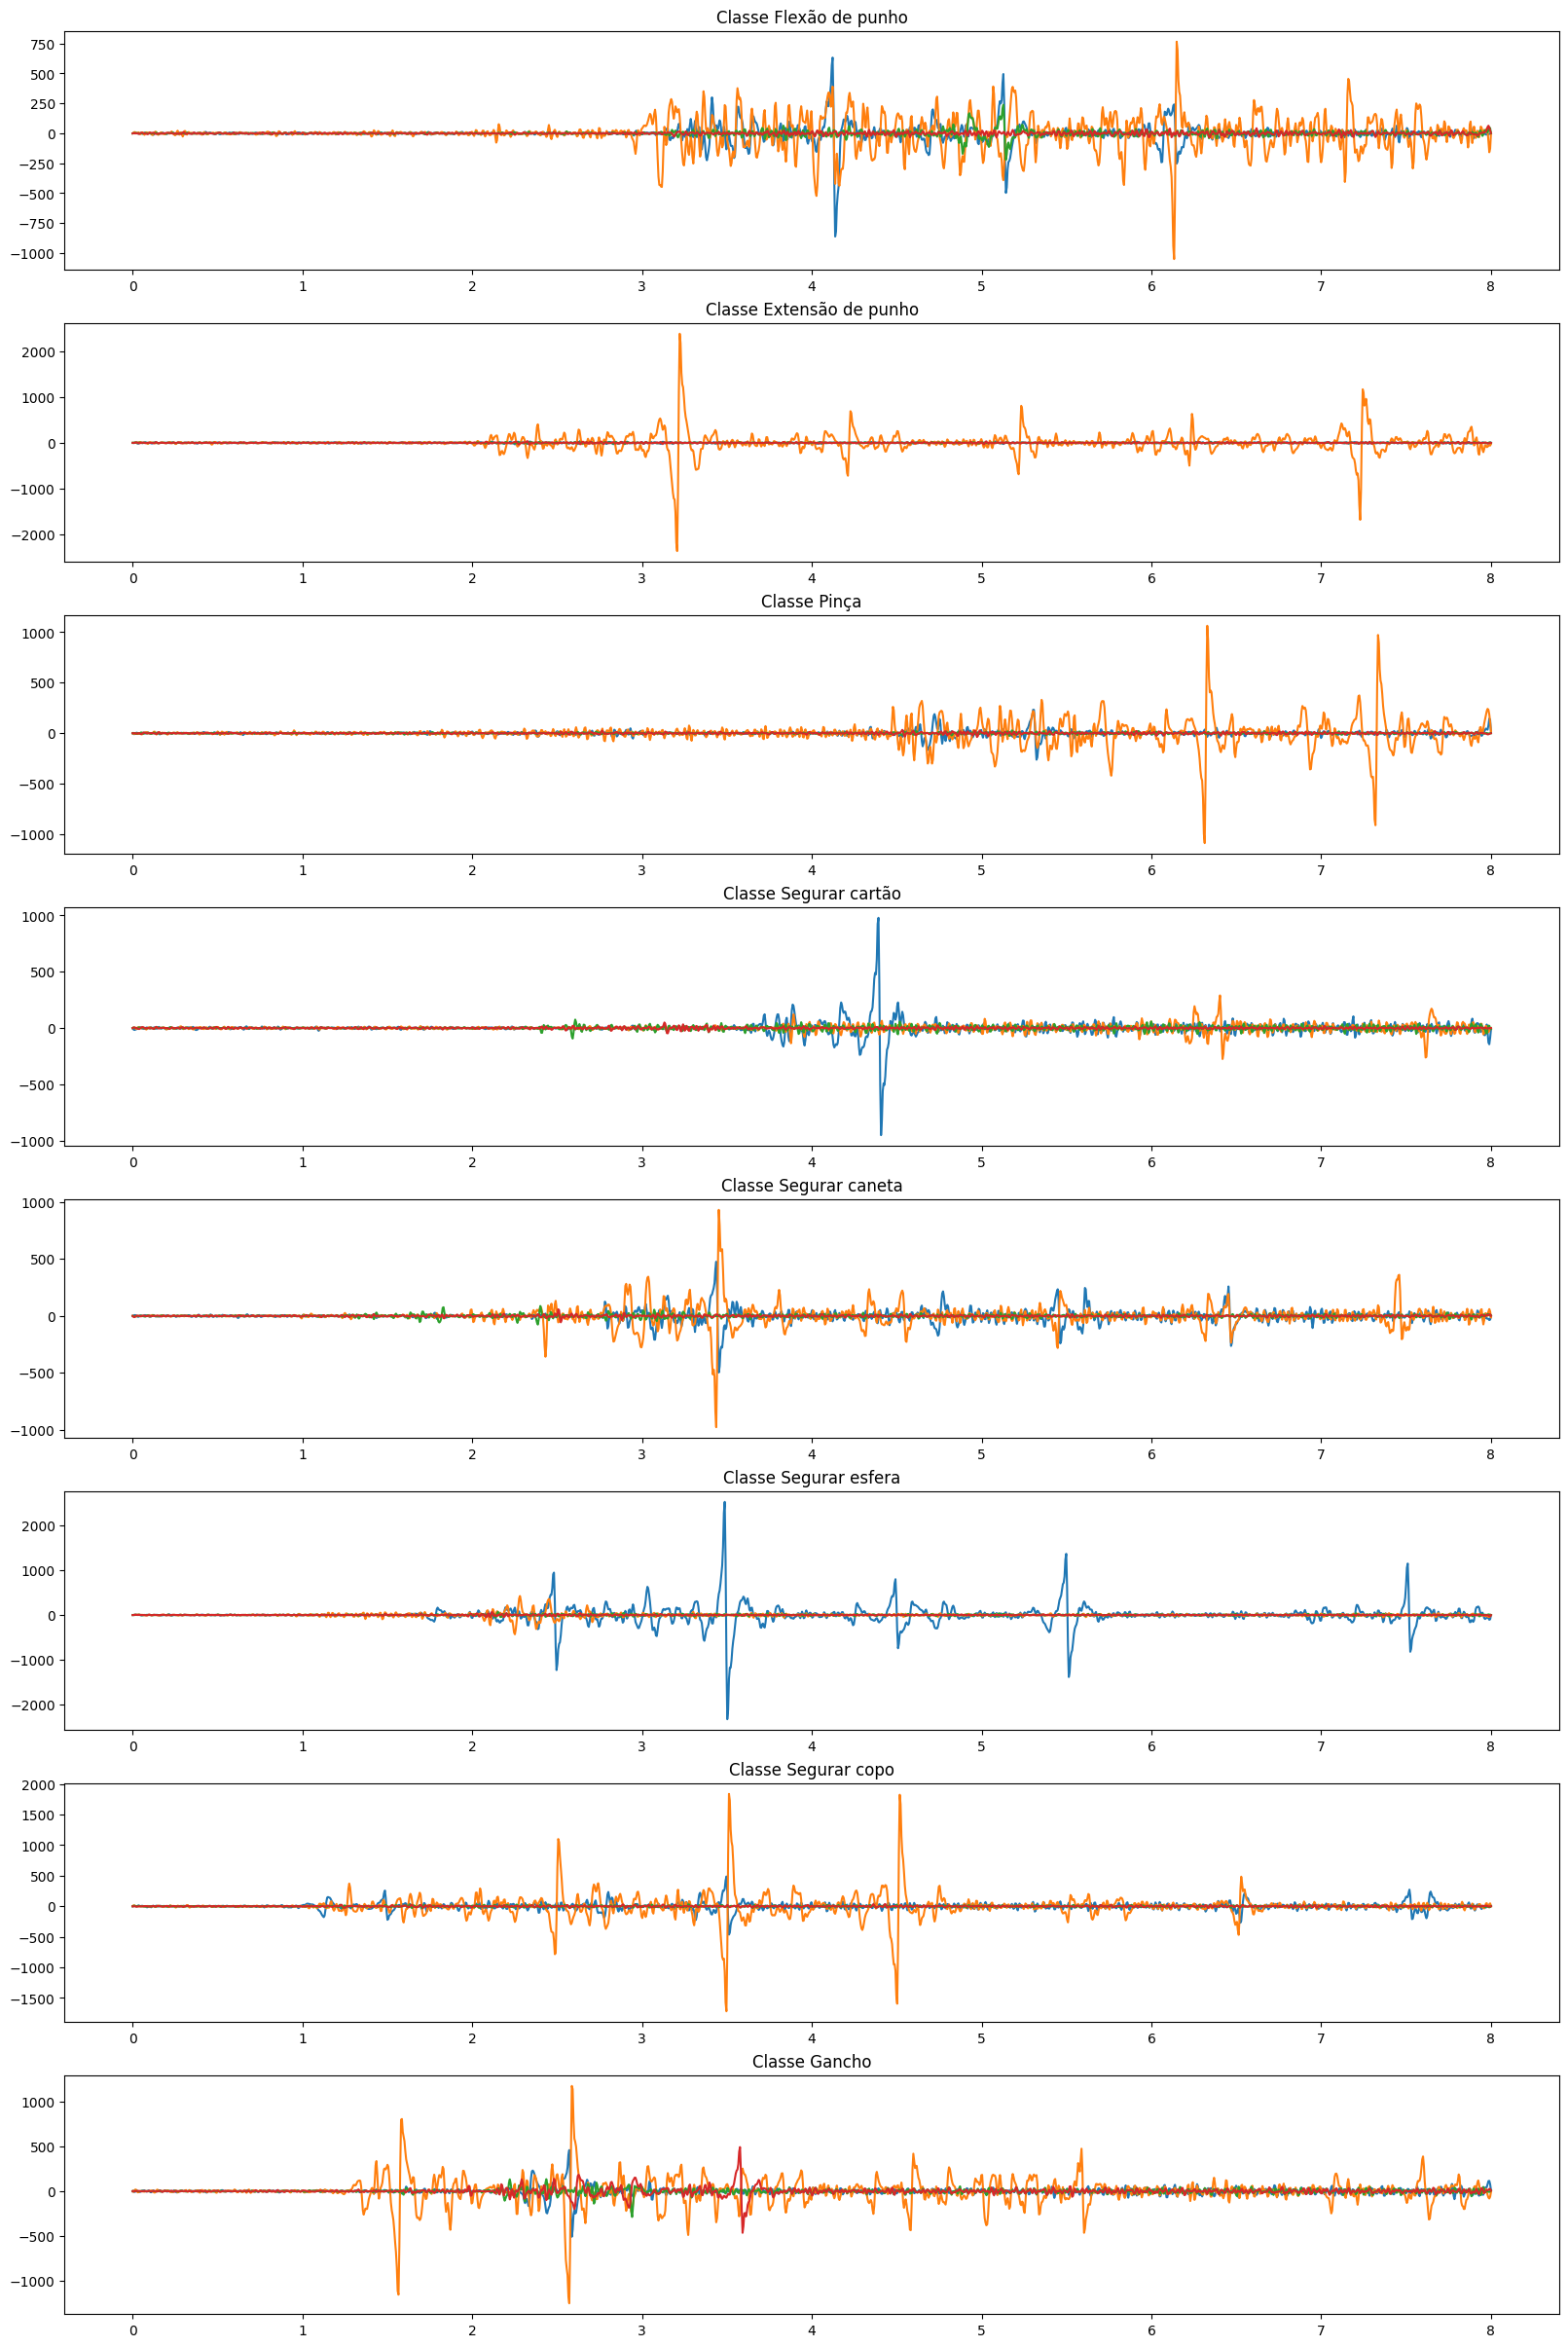

In [5]:
#2D
#recebo voluntario -> data = classes, eletrodos, valores
#diffClassSameTrial(voluntario[1, 2])
def diffClassSameTrial(data):
    if not data.shape:
        data = np.array(data)

    classeQtde = data.shape[0]
    eletrodoQtde = data.shape[1]
    protocol = ['Flexão de punho', 'Extensão de punho', 'Pinça', 'Segurar cartão', 'Segurar caneta', 'Segurar esfera', 'Segurar copo', 'Gancho']
    
    #world params
    x = np.linspace(0, 8, 1600) #de 0 a 8segundos - 1600 pontos
    rcParams['figure.figsize'] = [16., 3. * classeQtde]

    fig, ax = plt.subplots(classeQtde, 1, constrained_layout=True)    
    # fig.suptitle()

    for classe in range(classeQtde):
        ax[classe].set_title(f'Classe {protocol[classe]}')

        for eletrodo in range(eletrodoQtde):
            bp_data = butter_bandpass(data[classe][eletrodo], 5, 50)
            ax[classe].plot(x, bp_data)

    plt.show()
#end

for i, voluntario in enumerate(data):
    if i in [0]: # pra quando nao quiser printar tudo
        print('=================================================')
        print(f'~~~~~~~~~~~~~~~~ VOLUNTARIO {i+1} ~~~~~~~~~~~~~~~~~~')
        print('=================================================')

        for trial in [0]:
            diffClassSameTrial(voluntario[trial])


~~~~~~~~~~~~~~~~ VOLUNTARIO 1 ~~~~~~~~~~~~~~~~~~


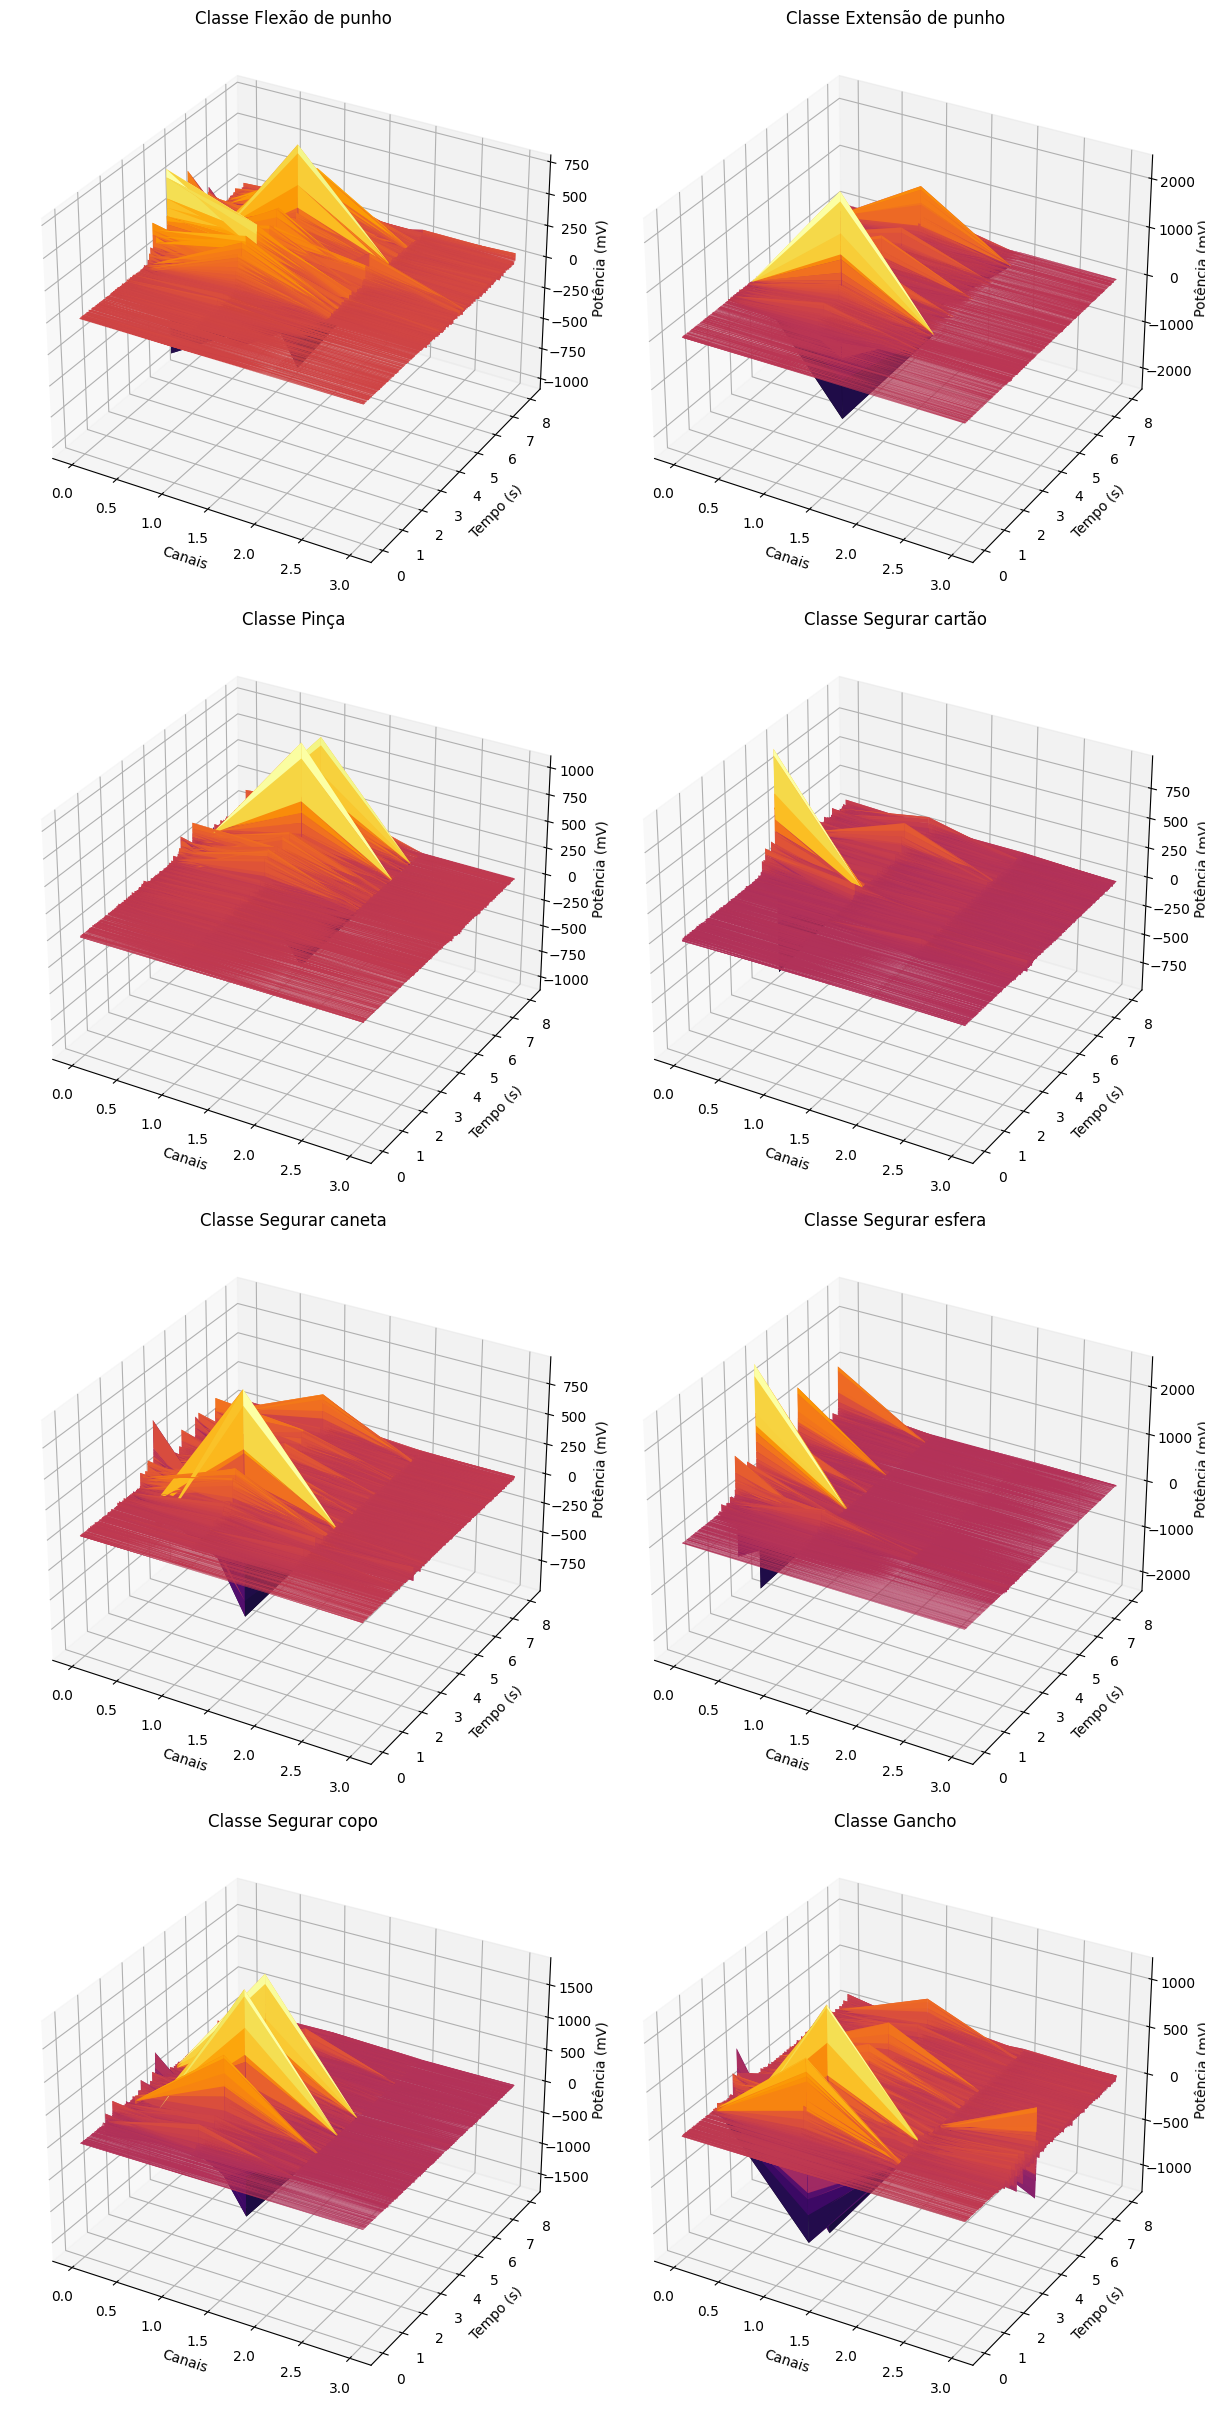

In [6]:
#3D
#recebo voluntario -> data = classes, eletrodos, valores
#diffClassSameTrial(voluntario[1, 2])
def diffClassSameTrial3d(data):
    if not data.shape:
        data = np.array(data)

    classeQtde = data.shape[0]
    eletrodoQtde = data.shape[1]
    protocol = ['Flexão de punho', 'Extensão de punho', 'Pinça', 'Segurar cartão', 'Segurar caneta', 'Segurar esfera', 'Segurar copo', 'Gancho']
    
    #world params
    x = np.linspace(0, 8, 1600) #de 0 a 8segundos - 1600 pontos
    rcParams['figure.figsize'] = [12., 6. * classeQtde/2]

    fig, ax = plt.subplots(int(classeQtde/2), 2, constrained_layout=True, subplot_kw={"projection": "3d"})    
    # fig.suptitle()

    # for classe in range(classeQtde):
    for classe, axx in enumerate(ax.flatten()):
        plot_data = []
        for eletrodo in range(eletrodoQtde):
            bp_data = butter_bandpass(data[classe][eletrodo], 5, 50)
            for i, time in enumerate(np.linspace(0, 8, 1600)):
                plot_data.append([eletrodo, time, bp_data[i]])
        plot_data = np.array(plot_data)

        axx.set_title(f'Classe {protocol[classe]}')
        axx.set_xlabel('Canais')
        axx.set_ylabel('Tempo (s)')
        axx.set_zlabel('Potência (mV)')

        x, y, z = plot_data[:,0], plot_data[:,1], plot_data[:,2]
        axx.plot_trisurf(x, y, z, antialiased=True, cmap=cm.inferno) #, linewidth=1)
    plt.show()
#end

for i, voluntario in enumerate(data):
    if i in [0]: # pra quando nao quiser printar tudo
        print('=================================================')
        print(f'~~~~~~~~~~~~~~~~ VOLUNTARIO {i+1} ~~~~~~~~~~~~~~~~~~')
        print('=================================================')
        
        for trial in [0]:
            diffClassSameTrial3d(voluntario[trial])
